In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import f
from scipy import stats
from sklearn.preprocessing import StandardScaler
import json
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import random
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anshjain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
zip_path = 'Data.zip'
data_folder = 'Data'

# Check if the target directory already exists
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    !unzip {zip_path} -d {data_folder}


In [32]:
#Extracting the data from the csv file
df = pd.read_csv('Data/USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Data Processing

In [33]:
# Remove each observation whose description contains non-ASCII text

bool_mask = df['description'].apply(lambda x: str(x).isascii())
non_ascii_mask = ~bool_mask

df = df.drop(df[non_ascii_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."


**REWRITE TO ACCOUNT FOR CHANGED METHOD**
We are converting the upload time the datetime object. We noticed there was a '+0:00' after all the terms and after doing some research, we realized this corresponds to the timezone. To verify that all objects were in the same time zone we used a boolean mask and saw every video in our dataframe had the exact same term so we can just remove it.

In [34]:
# convert publish_time to datetime
string_mask = df['publish_time'].apply(lambda x: x.replace('.000Z', ""))

df['publish_time'] = string_mask

df['upload_datetime'] = pd.to_datetime(df['publish_time'])
df = df.drop('publish_time', axis=1)

# removing videos without comments
bool_mask = df['comments_disabled'].apply(lambda x: str(x) == 'True')
df = df.drop(df[bool_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


In [35]:
with open('Data/US_category_id.json', 'r') as file:
    data = json.load(file)
categories_list = [(item["id"], item["snippet"]["title"]) for item in data["items"]]

def str_cat_id(x):

    for y in categories_list:

        if str(x) == str(y[0]):

            return y[1]

    return np.nan


df['category_id'] = df['category_id'].apply(lambda x: str_cat_id(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


# Exploratory Analysis and Data Visualization

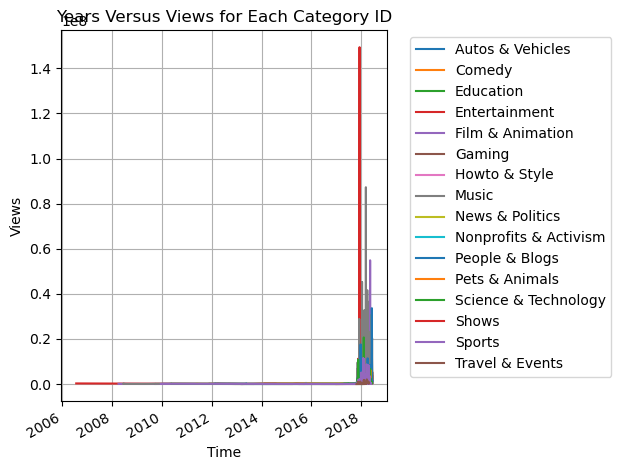

In [36]:
import math
fig, ax = plt.subplots()

# df_tmp = df.copy()
# df_tmp['tmp'] = df_tmp['views'].apply(lambda x: math.log(x))

for key, grp in df.groupby(['category_id']):

    ax = grp.plot(ax=ax, kind='line', x='upload_datetime', y='views', label=key)

plt.title('Years Versus Views for Each Category ID')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


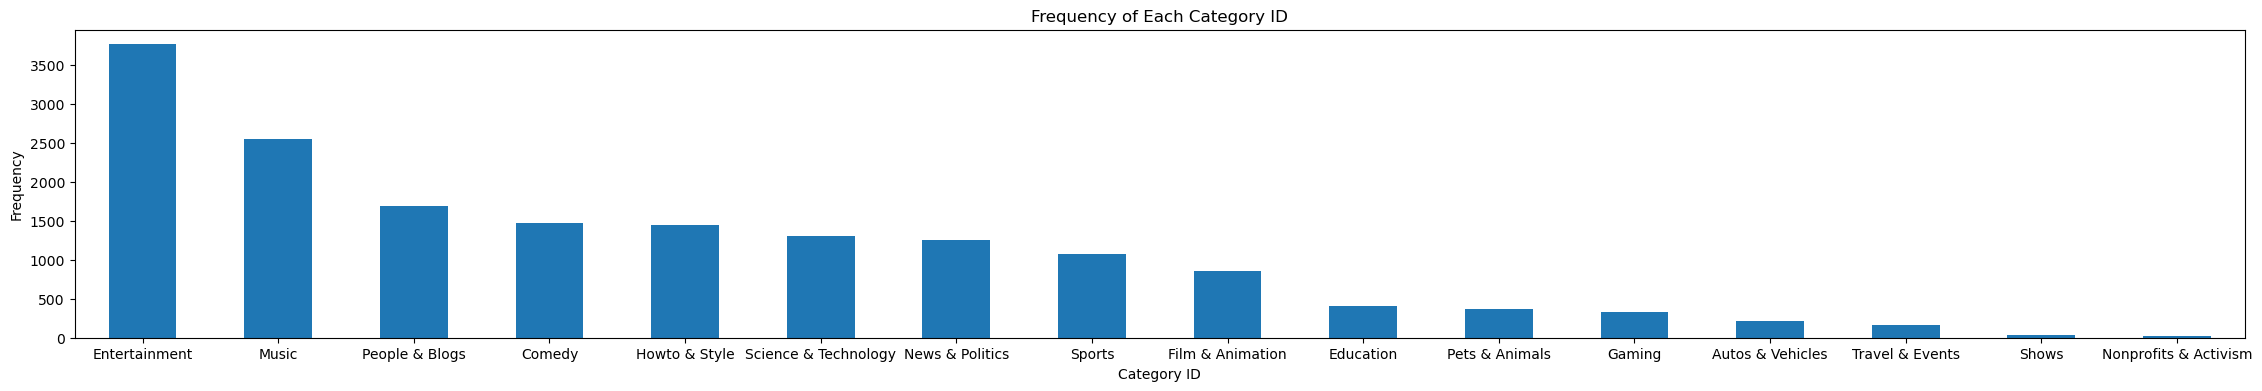

In [37]:
frequency = df['category_id'].value_counts()

plt.figure(figsize=(28, 4))
frequency.plot(kind='bar')
plt.title('Frequency of Each Category ID')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


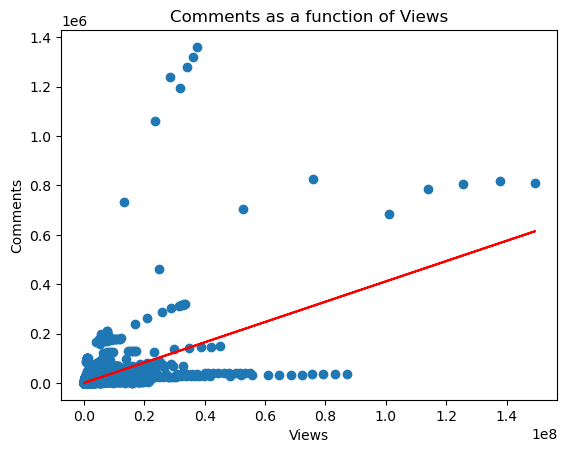

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7274.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        23:12:40   Log-Likelihood:            -1.9742e+05
No. Observations:               16985   AIC:                         3.948e+05
Df Residuals:                   16983   BIC:                         3.949e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.6828    222.116     -1.214      0.2

In [38]:
df_lin_reg = df[['views', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
# print(lst_sq)


# print("Linear Regression is ", str(slope) + " * years + " + str(intercept))
# int('Sum of squared residuals:', residual)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['views'], df['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Views')
ax.set_xlabel('Views')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ views ", data=df).fit()
print(lin_reg.summary())


# sum = 0
# for idx in range(df.shape[0]):

#     x_val = df['Rk'][idx]
#     actual= df['PTS'][idx]
#     pred = x_val * slope + intercept
#     sum += (pred - actual) ** 2

# mse = sum/df.shape[0]
# print('MSE:', mse)
# 

In [39]:
from scipy.stats import f

alpha = 0.05
dfn = 1 #k (degrees of freedom)
dfd = 16983 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  3.842006433905074


If we have H0 be there is no relationship between views and comments, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.842. From the OLS linear regression data, we have an F statistic of 7274. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments.

Text(0, 0.5, 'Comment Count')

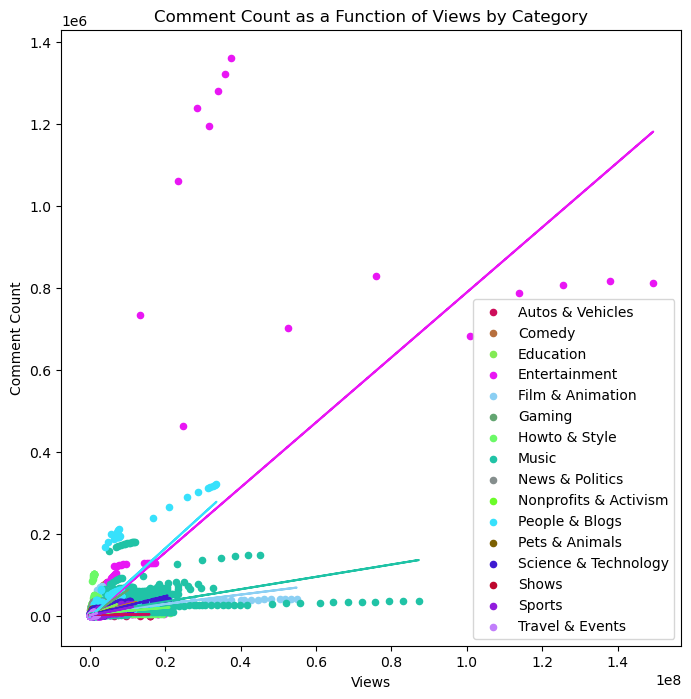

In [40]:
df_by_cont = df.groupby(['category_id'])
groups = df_by_cont.groups

def generate_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

colors = [generate_color() for _ in range(20)]

fig, ax = plt.subplots(figsize=(8,8))
for idx, (key, values) in enumerate(df.groupby(['category_id'])):

    ax = values.plot(ax=ax, kind='scatter', x='views', y='comment_count', label=key, color=colors[idx])
    x = values['views']
    y = values['comment_count']
    res = stats.linregress(x,y)
    ax.plot(x, res.intercept + res.slope*x, colors[idx])

ax.set_title('Comment Count as a Function of Views by Category')
ax.set_xlabel('Views')
ax.set_ylabel('Comment Count')

In [41]:
lin_reg2 = smf.ols(formula='comment_count ~ category_id*views', data=df).fit()
print(str(lin_reg2.summary()))

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     506.5
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        23:12:42   Log-Likelihood:            -1.9488e+05
No. Observations:               16985   AIC:                         3.898e+05
Df Residuals:                   16953   BIC:                         3.901e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [42]:
from scipy.stats import f

alpha = 0.05
dfn = 31 #k (degrees of freedom)
dfd = 16953 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  1.4518242081905073


If we have H0 be there is no relationship between views and comments, when seperating by video category, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 1.452. From the OLS linear regression data, we have an F statistic of 506.5. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments, when seperating by category.

In [43]:
f_val, p_val, diff_df = lin_reg2.compare_f_test(lin_reg) # returns f val, p val, difference in df
print("F-Statistic: ", f_val)

alpha = 0.05
dfn = lin_reg2.df_model - lin_reg.df_model
dfd = lin_reg2.df_resid
critical_val = f.ppf(1-alpha, dfn, dfd)

print("critical_val: ", critical_val)

F-Statistic:  196.98314642313855
critical_val:  1.459777783506337


Is the interaction model significantly better than the view count only model? Why?
Our null hypothesis is that our original linear regression is just as good as our model which accounts for the category type. From our F test, we get an F statistic of 196.98 and since we have a significance level of 0.05, our critical value is 1.4598 so our F statistic is greater than our critical value which means we reject the null hypothesis. Thus, our model which accounts for the continent is statistically better than our model which only accounts for year.

In [44]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['like_dislike_ratio'] = df.apply(lambda x: np.log(x['likes']/x['dislikes']) if x['dislikes'] != 0 else np.NaN, axis=1)

df.head()


/var/folders/54/4ghmcwpn4jsg86fh8m67t14h0000gn/T/ipykernel_60079/435005334.py:5: RuntimeWarning: divide by zero encountered in log
  df['like_dislike_ratio'] = df.apply(lambda x: np.log(x['dislikes']/x['likes']) if x['likes'] != 0 else np.NaN, axis=1)


,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime,sentiment,like_dislike_ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01,0.7038,-2.965040
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00,0.6705,-2.760815
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41,0.9290,-4.196949
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17,0.0000,-1.878106
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23,0.9826,-3.393606


[  62085.18966131 1628412.68938841]
                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.012
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.314
Time:                        23:12:57   Log-Likelihood:            -2.8352e+05
No. Observations:               16985   AIC:                         5.670e+05
Df Residuals:                   16983   BIC:                         5.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.62

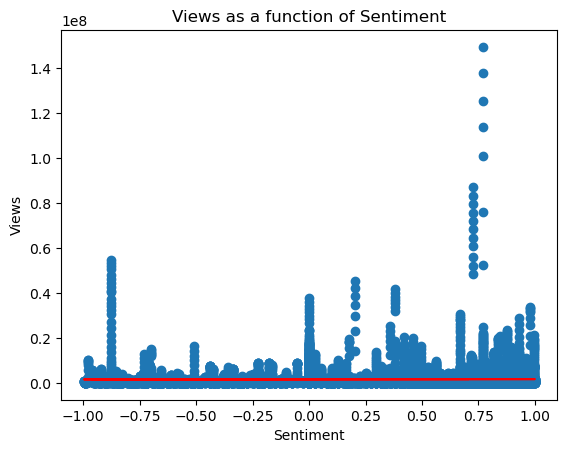

In [45]:
df_lin_reg = df[['sentiment', 'views']]

# df_lin_reg=df_lin_reg.dropna(axis=0)
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

# print("Linear Regression is ", str(slope) + " * years + " + str(intercept))
# int('Sum of squared residuals:', residual)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['views'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Views as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Views')
# plt.show()

lin_reg = smf.ols(formula="views ~ sentiment ", data=df).fit()
print(lin_reg.summary())

[ 917.58426178 6194.99654033]
                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.917
Date:                Fri, 17 May 2024   Prob (F-statistic):             0.0478
Time:                        23:12:57   Log-Likelihood:            -2.0045e+05
No. Observations:               16985   AIC:                         4.009e+05
Df Residuals:                   16983   BIC:                         4.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6194.9965 

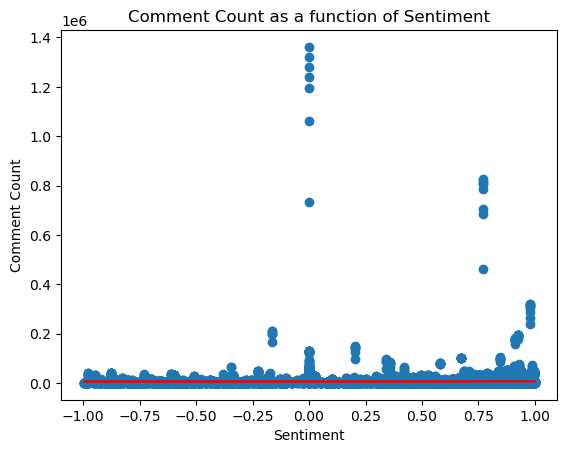

In [46]:
df_lin_reg = df[['sentiment', 'comment_count']]

# df_lin_reg=df_lin_reg.dropna(axis=0)
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

# print("Linear Regression is ", str(slope) + " * years + " + str(intercept))
# int('Sum of squared residuals:', residual)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comment Count as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Count')
# plt.show()

lin_reg = smf.ols(formula="comment_count ~ sentiment ", data=df).fit()
print(lin_reg.summary())

[nan nan]
                            OLS Regression Results                            
Dep. Variable:     like_dislike_ratio   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        23:12:58   Log-Likelihood:                    nan
No. Observations:               16951   AIC:                               nan
Df Residuals:                   16949   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept        -inf        nan        na

/Users/anshjain/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


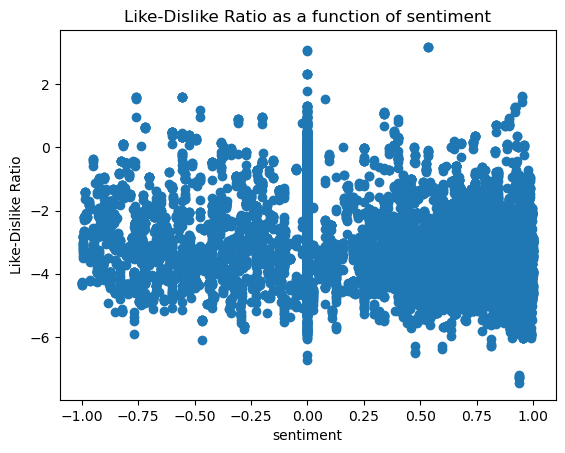

In [47]:
df_lin_reg = df[['sentiment', 'like_dislike_ratio']]

df_lin_reg=df_lin_reg.dropna(axis=0)
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

# print("Linear Regression is ", str(slope) + " * years + " + str(intercept))
# int('Sum of squared residuals:', residual)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['like_dislike_ratio'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Like-Dislike Ratio as a function of sentiment')
ax.set_xlabel('sentiment')
ax.set_ylabel('Like-Dislike Ratio')
# plt.show()

lin_reg = smf.ols(formula="like_dislike_ratio ~ sentiment ", data=df).fit()
print(lin_reg.summary())

Since it appears there is no correlation with the data, what if we only look at one video category

(412, 18)


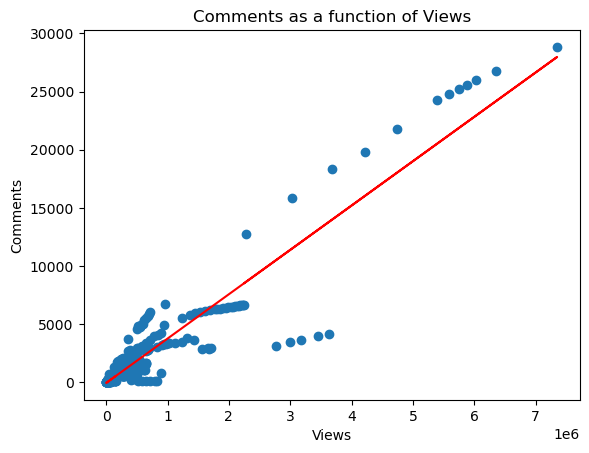

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2684.
Date:                Fri, 17 May 2024   Prob (F-statistic):          4.95e-182
Time:                        23:12:58   Log-Likelihood:                -3581.5
No. Observations:                 412   AIC:                             7167.
Df Residuals:                     410   BIC:                             7175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.6472     83.240     -0.693      0.4

In [48]:
df2 = df[df['category_id'] == 'Education']
print(df2.shape)
df2.head()

df_lin_reg = df2[['views', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['views'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Views')
ax.set_xlabel('Views')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ views ", data=df2).fit()
print(lin_reg.summary())

In [49]:
from scipy.stats import f

alpha = 0.05
dfn = 1 #k (degrees of freedom)
dfd = 410 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  3.864239267921459


If we have H0 be there is no relationship between views and comments for educational videos, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 2684. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments for educational videos

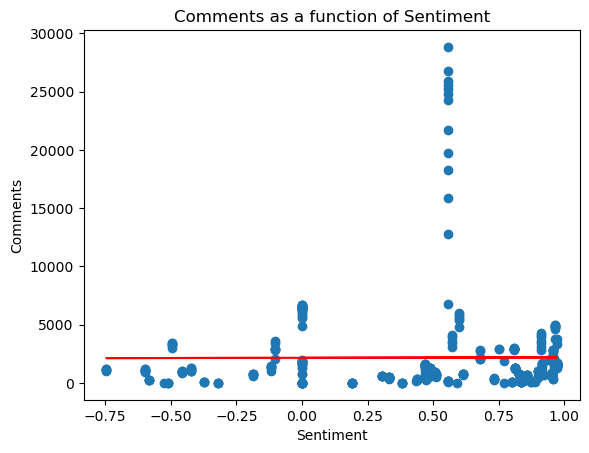

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.008253
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.928
Time:                        23:12:58   Log-Likelihood:                -3997.8
No. Observations:                 412   AIC:                             8000.
Df Residuals:                     410   BIC:                             8008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2155.8290    273.552      7.881      0.0

In [50]:
df_lin_reg = df2[['sentiment', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['sentiment'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ sentiment ", data=df2).fit()
print(lin_reg.summary())

If we have H0 be there is no relationship between sentiment and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 0.008253. Since our critical value is greater than our F statistic, we accept our null hypothesis. Thus there is no relationship between sentiment and comments for educational videos

In [51]:
df_lin_reg = df2[['like_dislike_ratio', 'comment_count']]
df_lin_reg = df_lin_reg.dropna()
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['like_dislike_ratio'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of like_dislike_ratio')
ax.set_xlabel('like_dislike_ratio')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ like_dislike_ratio ", data=df2).fit()
print(lin_reg.summary())

** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

If we have H0 be there is no relationship between log-like-dislike ratio and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 0.2564. Since our critical value is greater than our F statistic, we accept our null hypothesis. Thus there is no relationship between log-like-dislike ratio and comments for educational videos

/var/folders/54/4ghmcwpn4jsg86fh8m67t14h0000gn/T/ipykernel_60079/3347606127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['upload_datetime_numeric'] = (df2['upload_datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


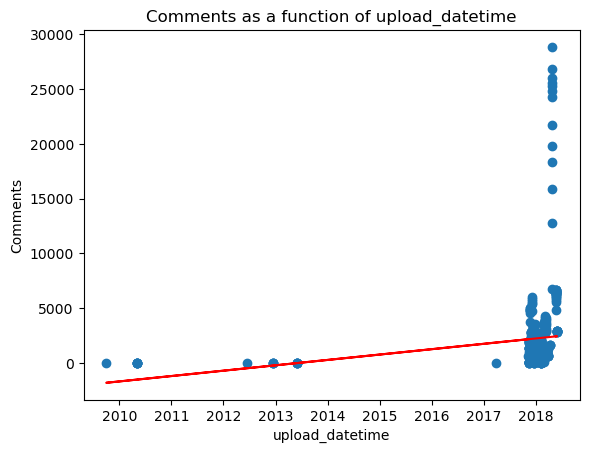

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     10.25
Date:                Fri, 17 May 2024   Prob (F-statistic):            0.00148
Time:                        23:09:08   Log-Likelihood:                -3992.8
No. Observations:                 412   AIC:                             7990.
Df Residuals:                     410   BIC:                             7998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Convert datetime to numeric format (e.g., seconds since epoch)
df2['upload_datetime_numeric'] = (df2['upload_datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# df2.head()
# Prepare data for linear regression
df_lin_reg = df2[['upload_datetime_numeric', 'comment_count']].dropna()
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:, 0]
Y = np_lin_reg[:, 1]

# Add a column of ones to X for the intercept term
# X_ones = np.c_[np.ones(X.shape[0]), X]
X_ones = np.vstack([X, np.ones(len(X))]).T

# Perform the least squares fitting
lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

# Plotting the data and the regression line
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['upload_datetime'], df2['comment_count'])
ax.plot(df2['upload_datetime'], intercept + slope * df2['upload_datetime_numeric'], 'r')
ax.set_title('Comments as a function of upload_datetime')
ax.set_xlabel('upload_datetime')
ax.set_ylabel('Comments')
plt.show()

# Perform linear regression using statsmodels
lin_reg = smf.ols(formula="comment_count ~ upload_datetime_numeric", data=df2).fit()
print(lin_reg.summary())
